# Can a Customized VGG-19 Detect Your Age, Race, and Sex All at Once?

#### Libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, ZeroPadding2D,\
    Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from time import time, sleep
from winsound import Beep
import cv2
import os
os.chdir('C:/Users/Nicolas/Documents/Data/faces')

#### Functions

Stopwatch 

In [42]:
def stopwatch():
    if time()-start < 120:
        print(str(int(time()-start)), 'seconds')
    else:
        print(str(int((time()-start)/60)), 'minutes')
    for i in range(3):
        for i in range(3):
            Beep(1_000, 100)
            sleep(.02)
        sleep(1)

In [43]:
dtype = np.float16

#### Loading Images

In [44]:
files = glob('combined/resized/*.jpg')

In [45]:
print(f'We have {len(files):,} faces for analysis.')

We have 23,705 faces for analysis.


In [46]:
pictures_list = []
filename_list = []
number_to_upload = len(files)
ix = 0
for file in np.random.choice(files, number_to_upload):
    ix += 1
    if ix%3000 == 0:
        print('%i images uploaded'%(ix))
    if ix == number_to_upload:
        print()
        print('%i images were successfully uploaded'%(ix))
    image = cv2.imread(file, 1)
    pictures_list.append(image)
    filename_list.append(file)

3000 images uploaded
6000 images uploaded
9000 images uploaded
12000 images uploaded
15000 images uploaded
18000 images uploaded
21000 images uploaded

23705 images were successfully uploaded


In [47]:
height, width, channels = pictures_list[0].shape

In [48]:
print(f'We have {width} pixels of width, {height} pixels of height, and {channels} channels.')

We have 50 pixels of width, 50 pixels of height, and 3 channels.


Turning the data into an array

In [49]:
faces = np.array(pictures_list, dtype=dtype)

#### Getting the Labels

Labels

In [50]:
race = [i.split('_')[2] for i in filename_list]

In [51]:
age = np.array([i.split('_')[0].split('\\')[1] for i in filename_list], dtype=dtype)

In [52]:
sex = [i.split('_')[1] for i in filename_list]

Dictionaries

In [53]:
race_dict = {
             0: 'White',
             1: 'Black',
             2: 'Asian',
             3: 'Indian',
             4: 'Other'
            }

In [54]:
sex_dict = {
             0: 'Male',
             1: 'Female'
            }

#### Visualizing the Images / distributions

Race

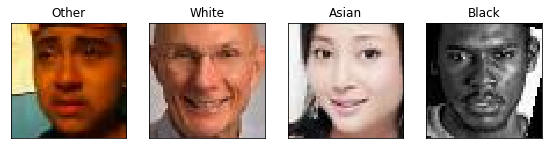

In [55]:
fig = plt.figure(figsize=(12, 12))
for i in range(1, 5):
    plt.subplot(1, 5, i)
    rand = np.random.randint(number_to_upload)
    ax = plt.imshow(cv2.cvtColor(pictures_list[rand], cv2.COLOR_BGR2RGB))
    title = plt.title(race_dict[int(race[rand])])
    yticks = plt.xticks([]); yticks = plt.yticks([])

In [56]:
np.unique(race, return_counts=True)[0]

array(['0', '1', '2', '3', '4'], dtype='<U1')

In [57]:
list(race_dict.values())

['White', 'Black', 'Asian', 'Indian', 'Other']

In [58]:
np.unique(race, return_counts=True)[0]

array(['0', '1', '2', '3', '4'], dtype='<U1')

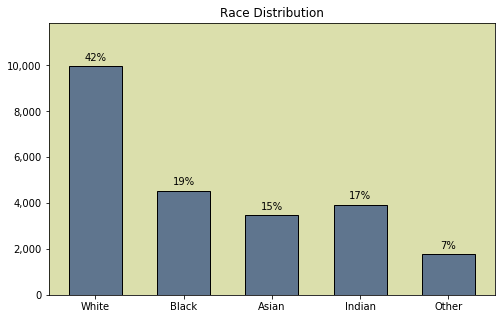

In [59]:
fig, ax = plt.subplots(figsize=(8, 5))
_=ax.bar(list(race_dict.values()), np.unique(race, return_counts=True)[1], edgecolor='k', color='#5F758E', width=.6)
_=ax.set_facecolor('#DBDFAC')
_=plt.title('Race Distribution')
_=plt.ylim(0, number_to_upload*.5)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/number_to_upload), (p.get_x()+.5*width, 
                                                p.get_y() + height + number_to_upload*.01), ha = 'center')
_=ax.set_yticklabels(['{:,}'.format(x) for x in np.array(ax.get_yticks(), 
                                                       dtype=int)])

Age

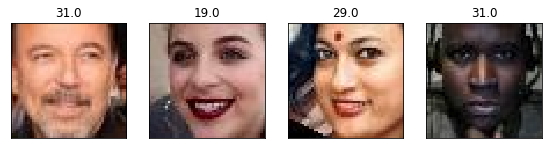

In [60]:
fig = plt.figure(figsize=(12, 12))
for i in range(1, 5):
    plt.subplot(1, 5, i)
    rand = np.random.randint(number_to_upload)
    ax = plt.imshow(cv2.cvtColor(pictures_list[rand], cv2.COLOR_BGR2RGB))
    title = plt.title(age[rand])
    yticks = plt.xticks([]); yticks = plt.yticks([])

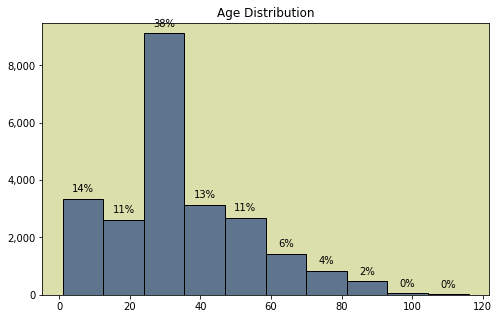

In [61]:
fig, ax = plt.subplots(figsize=(8, 5))
_=ax.hist(age, edgecolor='k', color='#5F758E')
_=ax.set_facecolor('#DBDFAC')
_=plt.title('Age Distribution')
_=plt.ylim(0, .4*number_to_upload)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/number_to_upload), (p.get_x()+.5*width, 
                                                p.get_y() + height + number_to_upload*.01), ha = 'center')
_=ax.set_yticklabels(['{:,}'.format(x) for x in np.array(ax.get_yticks(), 
                                                       dtype=int)])

Sex

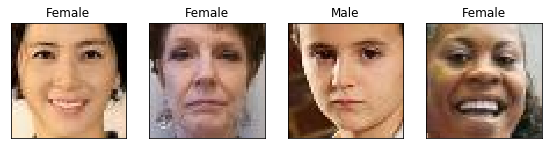

In [62]:
fig = plt.figure(figsize=(12, 12))
for i in range(1, 5):
    plt.subplot(1, 5, i)
    rand = np.random.randint(number_to_upload)
    ax = plt.imshow(cv2.cvtColor(pictures_list[rand], cv2.COLOR_BGR2RGB))
    title = plt.title(sex_dict[int(sex[rand])])
    yticks = plt.xticks([]); yticks = plt.yticks([])

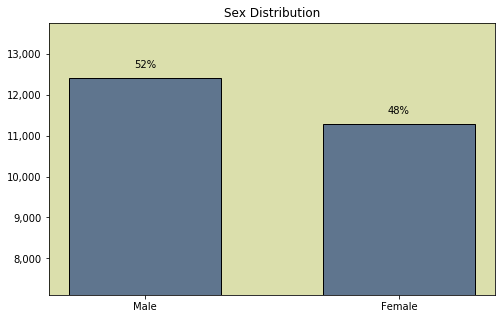

In [63]:
fig, ax = plt.subplots(figsize=(8, 5))
_=ax.bar(list(sex_dict.values()), np.unique(sex, return_counts=True)[1], edgecolor='k', color='#5F758E', width=.6)
_=ax.set_facecolor('#DBDFAC')
_=plt.title('Sex Distribution')
_=plt.ylim(.3*number_to_upload, .58*number_to_upload)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/number_to_upload), (p.get_x()+.5*width, 
                                                p.get_y() + height + number_to_upload*.01), ha='center')
_=ax.set_yticklabels(['{:,}'.format(x) for x in np.array(ax.get_yticks(), 
                                                       dtype=int)])

#### Encoding the Targets

In [64]:
race = to_categorical(race)

In [65]:
sex = to_categorical(sex, dtype=dtype)

In [66]:
age = np.array(age, dtype=dtype)

In [67]:
sex.shape, race.shape, age.shape

((23705, 2), (23705, 5), (23705,))

#### Rescale the Data

In [68]:
start = time()
X = np.divide(faces, 255, dtype=dtype)
stopwatch()

3 seconds


In [69]:
faces = None

In [70]:
X[0][0][:5]

array([[0.6196, 0.6196, 0.6196],
       [0.7373, 0.7373, 0.7373],
       [0.749 , 0.749 , 0.749 ],
       [0.698 , 0.698 , 0.698 ],
       [0.678 , 0.678 , 0.678 ]], dtype=float16)

In [71]:
X.shape

(23705, 50, 50, 3)

#### Train/test split

In [72]:
start = time()
xtrain, xtest, race_train, race_test, sex_train, sex_test, age_train,\
    age_test = train_test_split(X, race, sex, age, test_size=.2)
stopwatch()

0 seconds


#### Making a Model

Create a tensor

In [73]:
inputs = Input(shape=(X.shape[1], X.shape[2], X.shape[3]))

Create the model

In [75]:
x = ZeroPadding2D((1,1))(inputs)
x = Conv2D(64, 3, 3, activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(64, 3, 3, activation='relu')(x)

x = ZeroPadding2D((1,1))(x)
x = Conv2D(128, 3, 3, activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(128, 3, 3, activation='relu')(x)

x = ZeroPadding2D((1,1))(x)
x = Conv2D(256, 3, 3, activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(256, 3, 3, activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(256, 3, 3, activation='relu')(x)

x = ZeroPadding2D((1,1))(x)
x = Conv2D(512, 3, 3, activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(512, 3, 3, activation='relu')(x)
x = ZeroPadding2D((1,1))(x) 
x = Conv2D(512, 3, 3, activation='relu')(x)

x = ZeroPadding2D((1,1))(x) 
x = Conv2D(512, 3, 3, activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(512, 3, 3, activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(512, 3, 3, activation='relu')(x)

x = Flatten()(x)

race_ = Dense(1024, activation='relu')(x)
race_ = Dropout(0.5)(race_)
race_ = Dense(2048, activation='relu')(race_)
race_ = Dropout(0.5)(race_)
race_ = Dense(4096, activation='relu')(race_)
race_ = Dropout(0.5)(race_)
race_out = Dense(5, activation='softmax', name='race')(race_)

sex_ = Dense(1024, activation='relu')(x)
sex_ = Dropout(0.5)(sex_)
sex_ = Dense(2048, activation='relu')(sex_)
sex_ = Dropout(0.5)(sex_)
sex_ = Dense(4096, activation='relu')(sex_)
sex_ = Dropout(0.5)(sex_)
sex_out = Dense(2, activation='sigmoid', name='sex')(sex_)

age_ = Dense(1024, activation='relu')(x)
age_ = Dropout(0.5)(age_)
age_ = Dense(2048, activation='relu')(age_)
age_ = Dropout(0.5)(age_)
age_ = Dense(4096, activation='relu')(age_)
age_ = Dropout(0.5)(age_)
age_out = Dense(1, activation='linear', name='age')(age_)

Identify Output

In [76]:
predictions = [sex_out, race_out, age_out]

Finalize the model

In [77]:
model = Model(inputs=inputs, outputs=predictions)

Summarize the model

In [78]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50, 50, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_13 (ZeroPadding2 (None, 52, 52, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 17, 17, 64)   1792        zero_padding2d_13[0][0]          
__________________________________________________________________________________________________
zero_padding2d_14 (ZeroPadding2 (None, 19, 19, 64)   0           conv2d_13[0][0]                  
______________________________________________________________________________________________

Metrics dictionary

In [79]:
metrics_dict = {
    'race':'accuracy',
    'sex':'accuracy',
    'age':'mean_absolute_error'
}

Compile the model

In [80]:
model.compile(optimizer='adam',
              loss=['binary_crossentropy', 'categorical_crossentropy', 'mae'],
              metrics=metrics_dict)

Train the model

In [82]:
hist = model.fit(xtrain, [sex_train, race_train, age_train],
                 epochs=25,
                 batch_size=8,
                 validation_data=[xtest, [sex_test, race_test, age_test]])  

Train on 18964 samples, validate on 4741 samples
Epoch 1/25
18964/18964 [==============================] - 235s 12ms/sample - loss: 17.6604 - sex_loss: 0.6934 - race_loss: 1.4683 - age_loss: 15.4964 - sex_acc: 0.5178 - race_acc: 0.4177 - age_mean_absolute_error: 15.4987 - val_loss: 17.5951 - val_sex_loss: 0.6923 - val_race_loss: 1.4374 - val_age_loss: 15.4620 - val_sex_acc: 0.5220 - val_race_acc: 0.4343 - val_age_mean_absolute_error: 15.465818.3006 - sex_loss: 0.6936 - race_loss: 1.4812 - age_loss: 16.1258 - sex_acc: 0.5278 - race_acc: 0.4181 - age_mean_absolute_error: 1 - ETA: 3:06 - loss: 18.3024 - sex_loss: 0.6936 - race_loss: 1.4810 - age_loss: 16.1279 - sex_acc: 0.5280 - race_acc: 0.4185 - age_me - ETA: 3:03 - loss: 18.2173 - sex_loss: 0.6936 - race_loss: 1.47 - ETA: 2:52 - loss: 18.1125 - sex_loss: 0.6940 - race_loss: 1.4716 - age_loss: 15.9469 - sex_acc: 0.5235  - ETA: 2:46 - loss: 18.0898 - sex_loss: 0.6939 - race_loss: 1.4723 - age_loss: 15.9236 - sex_acc: 0.5224 - race_acc: 0

18964/18964 [==============================] - 232s 12ms/sample - loss: 17.2449 - sex_loss: 0.6922 - race_loss: 1.4617 - age_loss: 15.0896 - sex_acc: 0.5241 - race_acc: 0.4178 - age_mean_absolute_error: 15.0910 - val_loss: 17.2041 - val_sex_loss: 0.6922 - val_race_loss: 1.4362 - val_age_loss: 15.0705 - val_sex_acc: 0.5220 - val_race_acc: 0.4343 - val_age_mean_absolute_error: 15.0758
Epoch 10/25
18964/18964 [==============================] - 232s 12ms/sample - loss: 17.2228 - sex_loss: 0.6920 - race_loss: 1.4611 - age_loss: 15.0692 - sex_acc: 0.5240 - race_acc: 0.4178 - age_mean_absolute_error: 15.0697 - val_loss: 17.2082 - val_sex_loss: 0.6922 - val_race_loss: 1.4354 - val_age_loss: 15.0775 - val_sex_acc: 0.5220 - val_race_acc: 0.4343 - val_age_mean_absolute_error: 15.0806s: 1.4607 - age
Epoch 11/25
18964/18964 [==============================] - 232s 12ms/sample - loss: 17.2036 - sex_loss: 0.6922 - race_loss: 1.4604 - age_loss: 15.0494 - sex_acc: 0.5242 - race_acc: 0.4178 - age_mean_ab

#### Evaluating the model

In [83]:
eval = model.evaluate(xtest, [sex_test, race_test, age_test])

4741/4741 [==============================] - 5s 1ms/sample - loss: 17.2073 - sex_loss: 0.6920 - race_loss: 1.4342 - age_loss: 15.0197 - sex_acc: 0.5220 - race_acc: 0.4343 - age_mean_absolute_error: 15.0804


#### Inspecting the Epochs

In [84]:
df = pd.DataFrame(hist.history)
df.tail()

,loss,sex_loss,race_loss,age_loss,sex_acc,race_acc,age_mean_absolute_error,val_loss,val_sex_loss,val_race_loss,val_age_loss,val_sex_acc,val_race_acc,val_age_mean_absolute_error
20,17.146194,0.692127,1.459122,14.993476,0.524098,0.417792,14.994893,17.231976,0.692185,1.434128,15.106151,0.522042,0.434297,15.105527
21,17.175399,0.692056,1.459224,15.024551,0.524098,0.417792,15.024243,17.323885,0.692200,1.435121,15.197300,0.522042,0.434297,15.196594
22,17.177393,0.692041,1.458972,15.027892,0.524098,0.417792,15.026415,17.223595,0.692181,1.434627,15.097521,0.522042,0.434297,15.096530
23,17.170558,0.692006,1.459113,15.019177,0.524098,0.417792,15.019550,17.210276,0.692179,1.435055,15.079410,0.522042,0.434297,15.083115
24,17.174465,0.692080,1.458982,15.021531,0.524098,0.417792,15.023480,17.207296,0.692162,1.434624,15.085127,0.522042,0.434297,15.080394


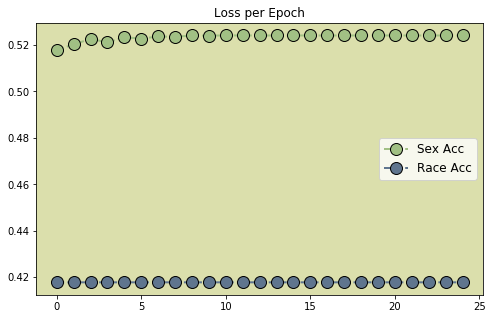

In [85]:
fig, ax = plt.subplots(figsize=(8, 5))
_=ax.set_facecolor('#DBDFAC')

_=plt.plot(df['sex_acc'], color='#A1C084', lw=2, marker='o', ms=12, mec='k', ls='--')
_=plt.plot(df['race_acc'], color='#5F758E', lw=2, marker='o', ms=12, mec='k', ls='--')

_=plt.legend(['Sex Acc', 'Race Acc'], fontsize='large')
_=plt.title('Loss per Epoch')

Well I guess not.